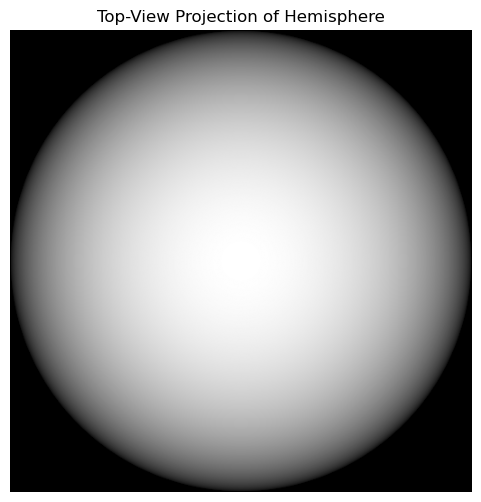

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
image_size = 512  # Width and height of the image
R = 1.0  # Radius of the hemisphere
alpha = 255  # Maximum intensity value (8-bit grayscale image)
I_max = alpha / R  # Modified intensity to remove geometric effects

# Create coordinate grid centered at (0,0)
x = np.linspace(-R, R, image_size)
y = np.linspace(-R, R, image_size)
X, Y = np.meshgrid(x, y)

# Convert to cylindrical coordinates
rho = np.sqrt(X**2 + Y**2)

# Compute z using the hemisphere equation (only valid for rho ≤ R)
valid_mask = rho <= R  # Mask to avoid complex numbers
Z = np.zeros_like(rho)  # Initialize Z with zeros
Z[valid_mask] = np.sqrt(R**2 - rho[valid_mask]**2)  # Solve for Z using hemisphere equation

# Compute intensity using the given formula I(ρ, ϕ, z) = I_max * z
intensity = I_max * Z

# Normalize for display (clip to range [0, 255])
intensity = np.clip(intensity, 0, 255)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='gray', extent=[-R, R, -R, R])
plt.axis('off')
plt.title('Top-View Projection of Hemisphere')
plt.show()

In [3]:
import numpy as np

# Compute the mean intensity of the top-view image, considering only the valid hemisphere region

# Mask for valid region (inside the circle of radius R)
valid_pixels = intensity[valid_mask]

# Compute the mean intensity
mean_intensity_top_view = np.mean(valid_pixels)

# Display the result
print("Mean Intensity of the Top-View Image:", mean_intensity_top_view)


Mean Intensity of the Top-View Image: 170.0581774491298


In [4]:
# Compute the mean intensity including the full square frame

# Total number of pixels in the square frame
total_pixels = image_size * image_size

# Mean intensity calculation including zero-intensity background
mean_intensity_with_frame = np.sum(valid_pixels) / total_pixels

# Display the result
print("Mean Intensity with Full Frame:", mean_intensity_with_frame)


Mean Intensity with Full Frame: 132.99547987060927


## Question number 3

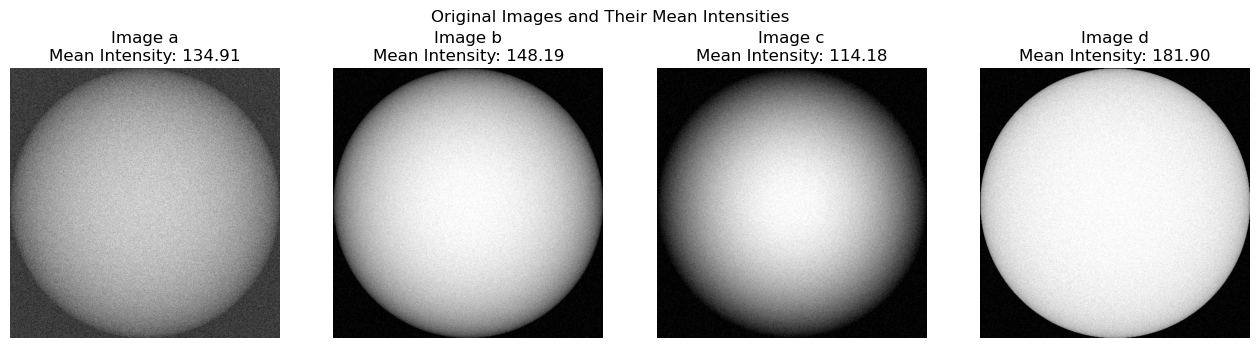

In [7]:
import cv2
# 3. Pixel Intensity Calibration Issues

# Load images
image_paths = {
    "a": "/mnt/e/Term 4/HW/HW2/images/q3/a.png",
    "b": "/mnt/e/Term 4/HW/HW2/images/q3/b.png",
    "c": "/mnt/e/Term 4/HW/HW2/images/q3/c.png",
    "d": "/mnt/e/Term 4/HW/HW2/images/q3/d.png"
}
# Read images in grayscale
images = {name: cv2.imread(path, cv2.IMREAD_GRAYSCALE) for name, path in image_paths.items()}

# Compute mean intensity of original images
mean_intensities_original = {name: np.mean(img) for name, img in images.items()}

# Display original images and their mean intensities
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for ax, (name, img) in zip(axes, images.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Image {name}\nMean Intensity: {mean_intensities_original[name]:.2f}")
    ax.axis("off")

plt.suptitle("Original Images and Their Mean Intensities")
plt.show()

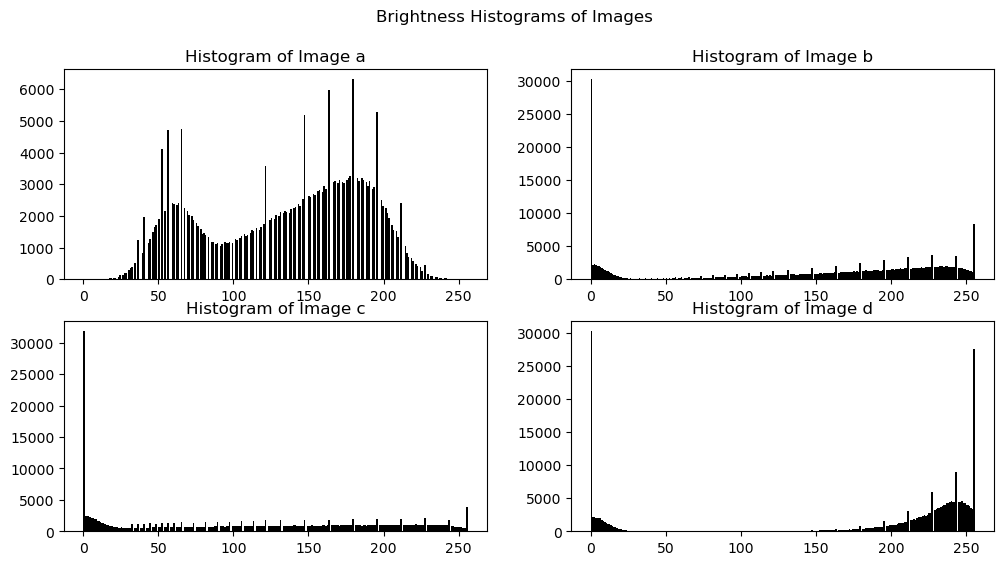

In [9]:
# Draw histograms
plt.figure(figsize=(12, 6))
for i, (name, img) in enumerate(images.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f"Histogram of Image {name}")

plt.suptitle("Brightness Histograms of Images")
plt.show()

_____

## To fix the problem of picture a:

In [20]:
# Compute minimum and maximum intensity values
min_intensity_a = np.min(images['a'])
max_intensity_a = np.max(images['a'])
mean_intensity_a = np.mean(images['a'])


# Print the results
print(f"Minimum Intensity in Image a: {min_intensity_a}")
print(f"Maximum Intensity in Image a: {max_intensity_a}")
print(f"Mean Intensity in Image a: {mean_intensity_a}")

Minimum Intensity in Image a: 0
Maximum Intensity in Image a: 255
Mean Intensity in Image a: 134.90629959106445


In [ ]:
def piecewise_linear_contrast(img, r1, s1, r2, s2):
    """
    Apply a piecewise linear contrast enhancement function.
    
    """
    img = img.astype(np.float32)  # Convert to float for calculations
    
    # First segment: 0 <= I < r1
    mask1 = img < r1
    img[mask1] = (s1 / r1) * img[mask1]

    # Second segment: r1 <= I < r2
    mask2 = (img >= r1) & (img < r2)
    img[mask2] = ((s2 - s1) / (r2 - r1)) * (img[mask2] - r1) + s1

    # Third segment: r2 <= I <= 255
    mask3 = img >= r2
    img[mask3] = ((255 - s2) / (255 - r2)) * (img[mask3] - r2) + s2

    return np.clip(img, 0, 255).astype(np.uint8) 

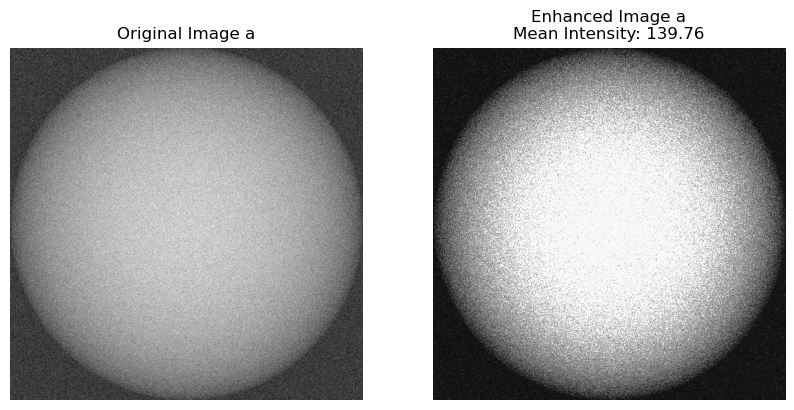

In [77]:
enhanced_img = piecewise_linear_contrast(images['a'], 75, 25, 200, 245)

# Compute mean intensity of the enhanced image
mean_intensity = np.mean(enhanced_img)

# Display original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images['a'], cmap='gray')
axes[0].set_title("Original Image a")
axes[0].axis("off")

axes[1].imshow(enhanced_img, cmap='gray')
axes[1].set_title(f"Enhanced Image a\nMean Intensity: {mean_intensity:.2f}")
axes[1].axis("off")

plt.show()

## To fix the problem of picture b:

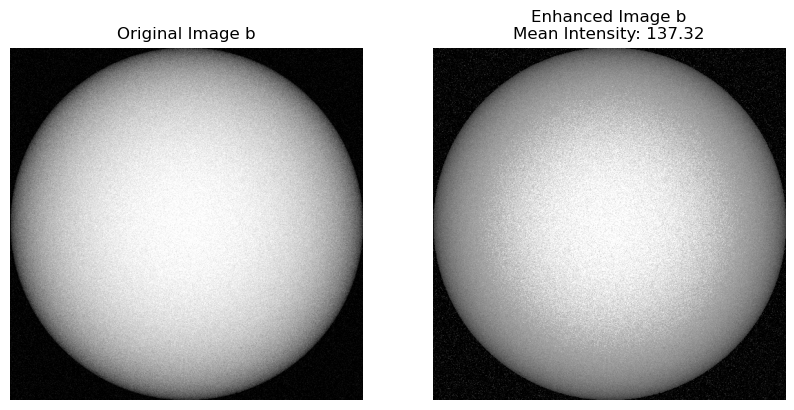

In [113]:
enhanced_img = piecewise_linear_contrast(images['b'], 30, 50, 200, 170)

# Compute mean intensity of the enhanced image
mean_intensity = np.mean(enhanced_img)

# Display original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images['b'], cmap='gray')
axes[0].set_title("Original Image b")
axes[0].axis("off")

axes[1].imshow(enhanced_img, cmap='gray')
axes[1].set_title(f"Enhanced Image b\nMean Intensity: {mean_intensity:.2f}")
axes[1].axis("off")

plt.show()

## To fix the problem of picture c:

In [114]:
def gamma_correction_manual(img, gamma, c=1.0):
    """
    Apply power-law (gamma) transformation manually: s = c * r^gamma
    """
    img_norm = img / 255.0  # Normalize to [0,1]
    img_gamma = np.zeros_like(img_norm, dtype=np.float32)  # Create empty array for output
    
    # Apply transformation manually
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_gamma[i, j] = c * (img_norm[i, j] ** gamma)
    
    img_gamma = (img_gamma * 255).astype(np.uint8)  # Scale back to [0,255]
    return img_gamma

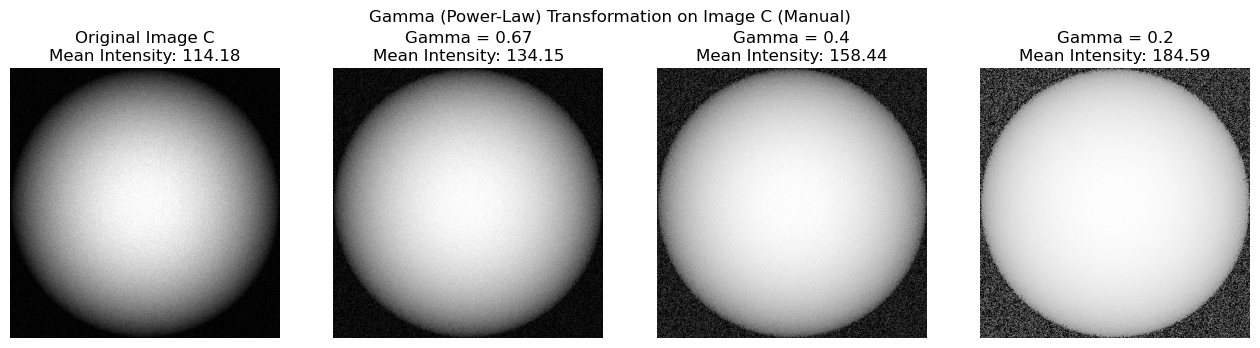

In [117]:
# Define gamma values
gamma_values = [0.67, 0.4, 0.2]

# Apply gamma correction for different values
gamma_corrected_images = {gamma: gamma_correction_manual(images['c'], gamma) for gamma in gamma_values}

# Compute mean intensities
mean_intensities = {gamma: np.mean(img) for gamma, img in gamma_corrected_images.items()}

# Display original and gamma-corrected images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(images['c'], cmap='gray')
axes[0].set_title("Original Image C\nMean Intensity: {:.2f}".format(np.mean(images['c'])))
axes[0].axis("off")

for ax, (gamma, img) in zip(axes[1:], gamma_corrected_images.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Gamma = {gamma}\nMean Intensity: {mean_intensities[gamma]:.2f}")
    ax.axis("off")

plt.suptitle("Gamma (Power-Law) Transformation on Image C (Manual)")
plt.show()

## To fix the problem of image d:

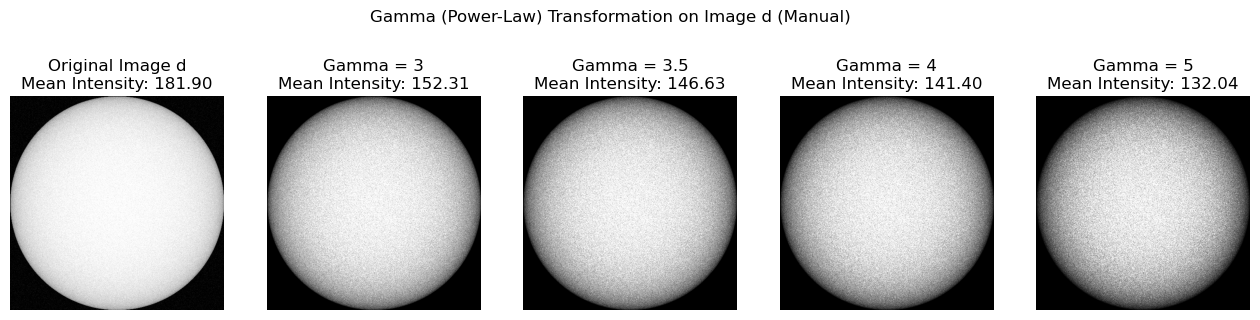

In [123]:
# Define gamma values
gamma_values = [3, 3.5, 4, 5]

# Apply gamma correction for different values
gamma_corrected_images = {gamma: gamma_correction_manual(images['d'], gamma) for gamma in gamma_values}

# Compute mean intensities
mean_intensities = {gamma: np.mean(img) for gamma, img in gamma_corrected_images.items()}

# Display original and gamma-corrected images
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
axes[0].imshow(images['d'], cmap='gray')
axes[0].set_title("Original Image d\nMean Intensity: {:.2f}".format(np.mean(images['d'])))
axes[0].axis("off")

for ax, (gamma, img) in zip(axes[1:], gamma_corrected_images.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Gamma = {gamma}\nMean Intensity: {mean_intensities[gamma]:.2f}")
    ax.axis("off")

plt.suptitle("Gamma (Power-Law) Transformation on Image d (Manual)")
plt.show()

In [131]:
# def inverse_log_transform(img, c=200/np.log(256)):
#     """
#     Apply inverse logarithmic transformation: s = c * (e^r - 1)
#     """
#     img_norm = img / 255.0  # Normalize to [0,1]
#     img_inverse_log = c * (np.exp(img_norm) - 1)  # Apply inverse log transformation
#     img_inverse_log = (img_inverse_log * 255 / np.max(img_inverse_log)).astype(np.uint8)  # Scale back to [0,255]
#     return img_inverse_log

# # Apply inverse logarithmic transformation
# image_d_inverse_log = inverse_log_transform(images['d'])

# # Compute mean intensity before and after transformation
# mean_intensity_d_original = np.mean(images['d'])
# mean_intensity_d_transformed = np.mean(image_d_inverse_log)

# # Display original and transformed images
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(images['d'], cmap='gray')
# axes[0].set_title(f"Original Image D\nMean Intensity: {mean_intensity_d_original:.2f}")
# axes[0].axis("off")

# axes[1].imshow(image_d_inverse_log, cmap='gray')
# axes[1].set_title(f"Inverse Log Transformed\nMean Intensity: {mean_intensity_d_transformed:.2f}")
# axes[1].axis("off")

# plt.suptitle("Inverse Logarithmic Transformation on Image D")
# plt.show()